## Introduction to Q-learning with OpenAI Gym
This is a step-by-step guide to using Q-learning in a simple OpenAI gym environment 

### Table of Contents

#### [Setup and Environment](#Setup_and_Environment)
- in this section, we download and examine the environment after importing all the necessary libraries;

#### [Q-learning](#Q-learning)
- in this section, we use Q-learning to solve the Taxi problem.


## Setup and Environment <a name='Setup_and_Environment'></a>

1. install the necessary packages and libraries;
2. set up the Taxi environment; 
3. determine the state and action space for our Q-table.

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output
import environment

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Fixing seed for reproducibility
np.random.seed(0) 

In [3]:
#Loading and rendering the gym environment
env = environment.Environment([
            [1, 2, 1, 2],
            [2, 1, 2, 1],
            []
        ])
env.reset()
env.render()

| 2 || 1 ||   |
| 1 || 2 ||   |
| 2 || 1 ||   |
| 1 || 2 ||   |
 ---  ---  --- 


In [4]:
#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(9)
State Space <tube.Game object at 0x000001E8D5ECE460>


## Q-learning <a name='Q-learning'></a>

1. initialize our Q-table given the state and action space in STEP 1;
    - choose the hyperparameters for training;
2. choose an action: explore or exploit in STEP 2;
3. perform the action and measure the reward in STEPs 3 & 4;
4. ^^
5. update the Q-table using the Bellman equation in STEP 5.
    - update the collected rewards
    - use decay to balance exploration and exploitation

In [5]:
#STEP 1 - Initializing the Q-table

print(env.observation_space.n)

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

70
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0.

In [6]:
#Setting the hyperparameters
              
alpha = 0.5 #learning rate                 
discount_factor = 0.6              
epsilon = 0.1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 500    
test_episodes = 100          
max_steps = 50 

In [7]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []

for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    state = env.reset()    
    #Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(max_steps):
        #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1) 
        
        
        ### STEP 2: SECOND option for choosing the initial action - exploit     
        #If the random number is larger than epsilon: employing exploitation 
        #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            possible_actions = state.get_possible_actions()
            sorted_actions = np.sort(Q[env.get_index(state),:])
            for i in range(0, len(sorted_actions)):
                if i in possible_actions:
                    action = i
                    break
            
        ### STEP 2: FIRST option for choosing the initial action - explore       
        #Otherwise, employing exploration: choosing a random action 
        else:
            action = env.get_action_space_sample()
            
            
        ### STEPs 3 & 4: performing the action and getting the reward     
        #Taking the action and getting the reward and outcome state
        new_state, reward, done, info = env.step(action)


        ### STEP 5: update the Q-table
        #Updating the Q-table using the Bellman equation
        Q[env.get_index(state), action] = Q[env.get_index(state), action] + alpha * (reward + discount_factor * np.max(Q[env.get_index(new_state), :]) - Q[env.get_index(state), action]) 
        #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state
        env.state = new_state     
        
        #Ending the episode
        if done == True:
            print("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    if total_training_rewards < 0:
        print("Failed episode:", episode)

    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    

print("Training score over time: " + str(sum(training_rewards)/train_episodes))
print(Q)

Failed episode: 0
Total reward for episode 1: -1
Failed episode: 1
Total reward for episode 2: -3
Failed episode: 2
Total reward for episode 3: 1
Total reward for episode 4: 1
Total reward for episode 5: 1
Total reward for episode 6: 1
Total reward for episode 7: -7
Failed episode: 7
Total reward for episode 8: -1
Failed episode: 8
Total reward for episode 9: -1
Failed episode: 9
Total reward for episode 10: -3
Failed episode: 10
Total reward for episode 11: -5
Failed episode: 11
Total reward for episode 12: -1
Failed episode: 12
Total reward for episode 13: -1
Failed episode: 13
Total reward for episode 14: -1
Failed episode: 14
Total reward for episode 15: -7
Failed episode: 15
Total reward for episode 16: 2
Total reward for episode 17: 1
Total reward for episode 18: 1
Total reward for episode 19: 2
Total reward for episode 20: 2
Total reward for episode 21: -1
Failed episode: 21
Total reward for episode 22: -7
Failed episode: 22
Total reward for episode 23: -3
Failed episode: 23
Tot

Total reward for episode 243: 1
Total reward for episode 244: 1
Total reward for episode 245: 2
Total reward for episode 246: 2
Total reward for episode 247: 2
Total reward for episode 248: 1
Total reward for episode 249: 2
Total reward for episode 250: 2
Total reward for episode 251: 2
Total reward for episode 252: 2
Total reward for episode 253: 2
Total reward for episode 254: 2
Total reward for episode 255: 2
Total reward for episode 256: 2
Total reward for episode 257: 2
Total reward for episode 258: 2
Total reward for episode 259: 1
Total reward for episode 260: 2
Total reward for episode 261: 2
Total reward for episode 262: 2
Total reward for episode 263: 2
Total reward for episode 264: 2
Total reward for episode 265: 2
Total reward for episode 266: 1
Total reward for episode 267: 1
Total reward for episode 268: -1
Failed episode: 268
Total reward for episode 269: 2
Total reward for episode 270: 2
Total reward for episode 271: 2
Total reward for episode 272: 2
Total reward for ep

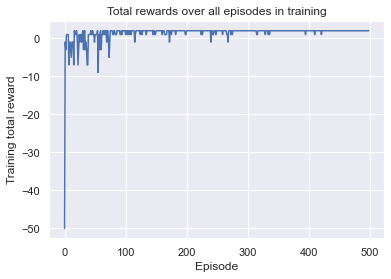

In [8]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

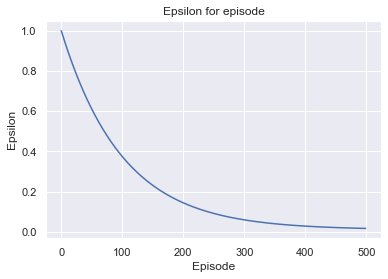

In [9]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()